<a href="https://colab.research.google.com/github/FadhilRisandi/Machine_Learning_2022/blob/main/TugasMID_Kelompok_Machine_Learning_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kelompok Machine Learning : 

Ahamad Haidir H071201051

Brad Rowen Yaparto H071201081

Andi Fadhil Risandi Kresna H071201082

ST Mustika BM H071201083
                            

Dataset ini berasal dari website kaggle. Tujuan dari kumpulan data ini adalah untuk memprediksi secara diagnostik apakah seorang pasien menderita diabetes atau tidak emua pasien di sini adalah wanita berusia minimal 21 tahun dari keturunan Pima Indian.2 Dari kumpulan data dalam File (.csv) Kami dapat menemukan beberapa variabel, beberapa di antaranya independent (beberapa variabel prediktor medis) dan hanya satu variabel terikat target (Hasil).

Kita mengimpor beberapa library python untuk digunakan dalam preprocessing dataset tersebut. Library yang digunakan adalah sebagai berikut :

In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

langkah pertama dalam preprocessing data adalah mengimpor dataset diabetes dengan library pandas, kemudian menampilkan sebagian data dari dataset diabetes tersebut.

In [232]:
df1= pd.read_csv('/content/diabetes.csv')
df1.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Kemudian menggunakan fungsi describe() untuk menghasilkan dan menampilkan ringkasan statistik dari dataset diabetes.

In [233]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Kemudian kita memeriksa dan menghitung nilai null di dalam suatu dataset kita menggunakan Fungsi isnull().sum().

In [234]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


dari code diatas dataset tidak memiliki Nilai Null dan semua data dalam Format Numerik, ini bagus karena menghemat waktu Preprocessing Data.

kemudian tampilakan nilai unik dari kolom outcome dengan menggunakan fungsi value_counts()

In [235]:
values = df1['Outcome'].value_counts()
names = values.index

In [236]:
values

0    500
1    268
Name: Outcome, dtype: int64

Outcome di dalam dataset diabetes adalah 0 dan 1, dimana nilai 0 ada sebanyak 500 dan 1 sebanyak 268. Untuk lebih mudah memahaminya kita akan menvisualisakan value_counts() tersebut.


In [237]:
fig = px.bar(x=names, y=values, title="Class Distribution")
fig.update_layout({'title':{'x':0.5}})
fig.show()

Dengan menggunakan library pandas, Matplotlib dan Seaborn, kita dapat melihat correlations dari feature-feature dari dataset diabetes ini. corr() digunakan untuk menemukan korelasi berpasangan dari semua kolom di Pandas Dataframe dengan Python 

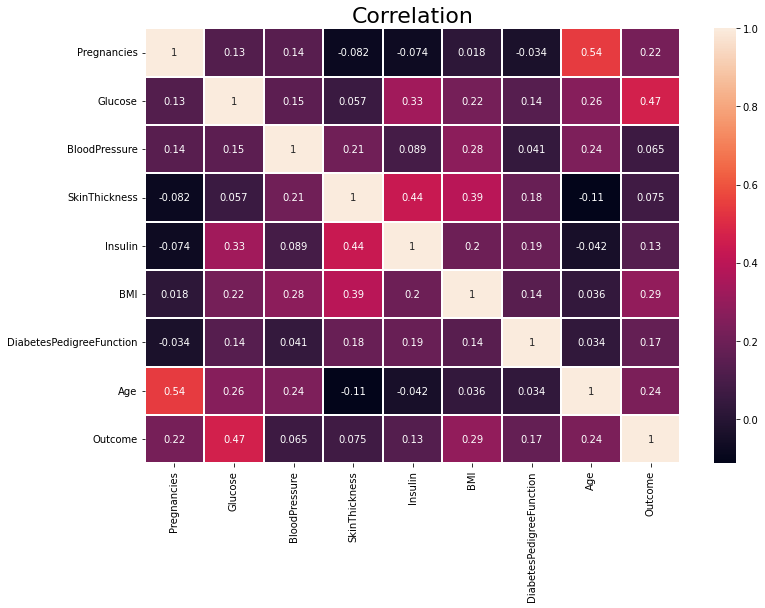

In [238]:
df1_corr = df1.corr()
plt.figure(figsize=(12,8))
sns.heatmap(df1_corr, linewidth=1, annot=True, annot_kws={'size':10})
plt.title('Correlation', fontsize=22)
plt.show()

korelasi positif ditunjukan dengan warna yang lebih terang. Sementara korelasi negatif akan ditunjukan dalam warna yang gelap. Hampir semua hubungan positif, mari kita lihat beberapa korelasi yang paling kuat. 

Ada Age dan Preganancies memiliki korelasi data dengan nilai 0,54 ini masuk akal jika Jumlah Kehamilan akan meningkat dengan bertambahnya Usia. Namun, tidak ada pemisahan yang jelas antara kelas sasaran tetapi dapat terlihat bahwa dengan bertambahnya usia dan jumlah kehamilan, risiko diabetes meningkat.

setelah korelasi age dan pregnancies ada korelasi antara glucose dengan outcome yang memiliki nilai korelasi 0,47. Hal ini menunjukkan bahwa jika memiliki glukosa tinggi, mungkin dapat mengakibatkan Diabetes.



In [239]:
# membagi data menjadi fitur/masukan dan target/keluaran
X=df1[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y=df1.Outcome

# membagi data menjadi set data pelatihan dan validasi 
X_train,X_test,y_train,y_test = ms.train_test_split(X,y,test_size=0.2,random_state=0)

In [240]:
#Menampilkan X_test
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31
...,...,...,...,...,...,...,...,...
476,2,105,80,45,191,33.7,0.711,29
482,4,85,58,22,49,27.8,0.306,28
230,4,142,86,0,0,44.0,0.645,22
527,3,116,74,15,105,26.3,0.107,24


In [241]:
# Buat nama pengukurun
metric_names = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Perhitungan dari pengukuran tersebut
def measures(preds):
    acc = accuracy_score(y_test, preds)
    pre = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1_ = f1_score(y_test, preds)
    cm = confusion_matrix(y_test, preds)
    return [acc, pre, rec, f1_]

In [242]:
# Logistic regression
lr = lm.LogisticRegression()
lr.fit(X_train, y_train)

# Prediction
prediction = lr.predict(X_test)

# Pengukuran Logistik regression
lr_scores = measures(prediction)
cm = confusion_matrix(prediction, y_test)

# Tampilkan
print("Logistic Regression : \n")
for i, name in enumerate(metric_names):
    print(f"\t{name:10}  : {lr_scores[i]:.4f}")
print(f"\nConfusion Matrix : \n")

fig = px.imshow(cm, text_auto=True, color_continuous_scale='fall', width=400, height=400)
fig.show()

Logistic Regression : 

	Accuracy    : 0.8247
	Precision   : 0.7632
	Recall      : 0.6170
	F1 Score    : 0.6824

Confusion Matrix : 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [243]:
y_test

661    1
122    0
113    0
14     1
529    0
      ..
476    1
482    0
230    1
527    0
380    0
Name: Outcome, Length: 154, dtype: int64

In [244]:
print(prediction)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]


In [245]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=lm.LogisticRegression(), n_features_to_select=5)
rfe = rfe.fit(X_train, y_train)
print('Support = ',rfe.support_)
print('Ranking = ',rfe.ranking_)

Support =  [ True  True False False False  True  True  True]
Ranking =  [1 1 2 3 4 1 1 1]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Penjelasan: Yg bernilai true, adalah feature no 1,2,6,7, dan 8 yaitu Pregnancies,	Glucose,	BMI,	DiabetesPedigreeFunction dan Age. Artinya keenam feature tersebut cukup berpengaruh dalam membuat model dengan akurasi yang tinggi, sehingga apabila dua feature lain diabaikan maka model tetap memberikan prediksi yg cukup baik.

In [246]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier(max_depth=3, max_features=5)
dtc.fit(X_train, y_train)

# Prediction
prediction = dtc.predict(X_test)

# Pengukuran Decision tree
dtc_scores = measures(prediction)
cm = confusion_matrix(prediction, y_test)

# Tampilkan
print("Decision Tree Classifier : \n")
for i, name in enumerate(metric_names):
    print(f"\t{name:10}  : {dtc_scores[i]:.4f}")
print(f"\nConfusion Matrix : \n")

fig = px.imshow(cm, text_auto=True, color_continuous_scale='fall', width=400, height=400)
fig.show()

Decision Tree Classifier : 

	Accuracy    : 0.7597
	Precision   : 0.6136
	Recall      : 0.5745
	F1 Score    : 0.5934

Confusion Matrix : 



In [247]:
model_names = ["LR", "DT"]

# Measures
accs = np.array([lr_scores[0],  dtc_scores[0]])
pres = np.array([lr_scores[1],  dtc_scores[1]])
recs = np.array([lr_scores[2],  dtc_scores[2]])
f1s = np.array([lr_scores[3],  dtc_scores[3]])

In [248]:
# Accuracy
fig = px.bar(x=model_names, y=accs, title="Accuracy", color=model_names)
fig.show()


In [249]:
# Precision
fig = px.bar(x=model_names, y=pres, title="Precision", color=model_names)
fig.show()

In [250]:
# Recall
fig = px.bar(x=model_names, y=recs, title="Recall", color=model_names)
fig.show()

In [251]:
# F1
fig = px.bar(x=model_names, y=f1s, title="F1 Score", color=model_names)
fig.show()